<a href="https://colab.research.google.com/github/helmana/DLeeg/blob/master/Merge/merge_random%20select%20Data_1D%20conv_%2010%20S_%20200000%20Train%20sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
!pip install mne

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
     |████████████████████████████████| 6.4MB 2.6MB/s 


In [0]:
'''

Train_Data_number = 200000
Test_Data_number = 50000
subject_number=10

test 1 - loss, acc :[0.1709, 0.97203]
test 2 - loss, acc :[0.4854, 0.93682]
test 3 - loss, acc :[1.9932, 0.40926]
test 4 - loss, acc :[1.4679, 0.5]

'''

In [2]:



import matplotlib

from matplotlib import pyplot as plt
import numpy as np

import math

import keras
from keras.utils import to_categorical

import random
import mne
from mne.preprocessing import create_ecg_epochs, create_eog_epochs
from mne import io
from mne import viz
#from mne.datasets import testing
from mne import Epochs, io, pick_types
from mne.event import define_target_events
from mne.time_frequency import psd_welch
print(__doc__)

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/numba/decorators.py:146: RuntimeWarning: Caching is not available when the 'parallel' target is in use. Caching is now being disabled to allow execution to continue.
  warnings.warn(msg, RuntimeWarning)


Automatically created module for IPython interactive environment


In [6]:


Train_Data_number = 200000
Test_Data_number = 50000



subject_number=10

new_subject_number = subject_number//5 # 
#index_new_subject = 0

train_subject_number = subject_number - new_subject_number

new_subject_start_index = train_subject_number
#train_subject_number =8
task_index = [1] # task: REO
task_number = len(task_index)

# channels 
list_channel = [60,61,62]
ch_number = len(list_channel)

task_time = 60

sampel_number_per_sec = 160 # sampel rate
total_sampel_number =  sampel_number_per_sec *task_time # 60*160

inner_sample_shift = 0 # inner step len
outer_sample_shift = 10 # outer step len
#window_len= 20

new_subject_start_index

8

In [4]:

# load dataset in array
list_raw_fnames = [[0]*task_number]*subject_number
for x in range(subject_number):
  list_raw_fnames[x] = mne.datasets.eegbci.load_data(x+1,task_index,path='/content/drive/My Drive/Deep Results/Database',update_path=False)

list_rawdata = np.zeros((subject_number,task_number), dtype='object')

for i in range(subject_number):
  for j in range(task_number):
    list_rawdata[i][j] = mne.io.read_raw_edf(list_raw_fnames[i][j], preload=True)

       

Extracting EDF parameters from /content/drive/My Drive/Deep Results/Database/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /content/drive/My Drive/Deep Results/Database/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /content/drive/My Drive/Deep Results/Database/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /content/drive/My Drive/Deep Results/Database/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R01.edf...
EDF file detected


In [7]:
subject_img_number = math.floor((total_sampel_number - sampel_number_per_sec - (window_len-1 )*inner_sample_shift) / outer_sample_shift) +1

test_img_number = math.floor(subject_img_number * 0.15)
test_img_start_index=subject_img_number - test_img_number
train_img_number =  test_img_start_index 

test_img_start_index


804

In [0]:

def normalize_channel_data(ch , i, ch_min, ch_max):
    ch = ((ch - ch_min[i]) / (ch_max[i] - ch_min[i] ))
    return ch

In [9]:
# All data
DataChannelsRaw = np.zeros((subject_number, ch_number,total_sampel_number), dtype = float)

for i in range(train_subject_number):
  for  j in range(ch_number):
    DataChannelsRaw[i][j], times =list_rawdata[i][0][list_channel[j],:total_sampel_number]
DataChannelsRaw_t = DataChannelsRaw.copy()

#normal all data
for i in range(subject_number):
  ch_max =[]
  ch_min =[]
  for  j in range(ch_number):    
    ch_max = np.append(ch_max, max(DataChannelsRaw_t[i][j])) # max for each cannel
    ch_min = np.append(ch_min, min(DataChannelsRaw_t[i][j])) # min for each cannel
    
    # Normalize Channels
    DataChannelsRaw_t[i][j]=normalize_channel_data(DataChannelsRaw_t[i][j], j, ch_min, ch_max)
    


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
DataChannelsRaw_t.shape

(10, 3, 9600)

In [0]:
def Extract_Data(rand_subject, rand_sample):

  Rand_Data =  np.zeros((ch_number, sampel_number_per_sec), dtype = float)
  for i in range(ch_number):
    
    ExtractedData = DataChannelsRaw_t[rand_subject][i, rand_sample : sampel_number_per_sec + rand_sample] 
    Rand_Data[i] = ExtractedData
    Rand_Data_transposed = Rand_Data.T
  return Rand_Data_transposed

In [0]:
def Fill_input_array(Data_number, first_index_subjectA, last_index_subjectA, first_index_sampleA, last_index_sampleA,   first_index_subjectB, last_index_subjectB, first_index_sampleB, last_index_sampleB):
  loop_counter = int(Data_number/2)
  
  input1 = np.zeros((Data_number, sampel_number_per_sec, ch_number), dtype = float)
  input2 = np.zeros((Data_number, sampel_number_per_sec, ch_number), dtype = float)
  input_label=[]
  
  for r in range(loop_counter):
    # select random subject and sample A
    rand_subjectA = random.randint(first_index_subjectA, last_index_subjectA)
    rand_sample1_A= random.randint(first_index_sampleA, last_index_sampleA) * outer_sample_shift
    rand_sample2_A= random.randint(first_index_sampleA, last_index_sampleA) * outer_sample_shift

    # 1: Select random data from subjectA 
    rand_Data1_subjectA = Extract_Data(rand_subjectA, rand_sample1_A)
    input1[r*2:r*2+2] = rand_Data1_subjectA

    # 2: Select random data from subjectA 
    rand_Data2_subjectA = Extract_Data(rand_subjectA, rand_sample2_A)
    input2[r*2] = rand_Data2_subjectA

    #set label 1
    input_label = np.append(input_label, 1) 



    # select random subject and sample B
    rand_sampleB= random.randint(first_index_sampleB, last_index_sampleB) * outer_sample_shift
    rand_subjectB = random.randint(first_index_subjectB, last_index_subjectB)
    # A != B
    while rand_subjectA == rand_subjectB:
      rand_subjectB = random.randint(first_index_subjectB, last_index_subjectB)

    # Select random data from subjectB
    rand_Data_subjectB = Extract_Data(rand_subjectB, rand_sampleB)
    input2[r*2+1] = rand_Data_subjectB

    #set label 0
    input_label = np.append(input_label, 0)
    
  return input1, input2, input_label


In [0]:
# **create Train Data 

Train_input1, Train_input2, train_label = Fill_input_array(Train_Data_number, 0, train_subject_number-1, 0, train_img_number-1, 0, train_subject_number-1, 0, train_img_number-1)

train_label = to_categorical(train_label, 2)


In [35]:


'''

Train_input1_transpose = Train_input1.T
Train_input2_transpose = Train_input2.T
Train_input1_transpose.shape
'''

(160, 3, 200000)

In [39]:
train_label

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [0]:
validation_index = math.floor( Train_Data_number * 0.2)


# validation & train

#train
x_train_1 =Train_input1[validation_index:]
x_train_2 =Train_input2[validation_index:]

y_train =train_label[validation_index:]

#validation
x_validation_1 =Train_input1[:validation_index]
x_validation_2 =Train_input2[:validation_index] 

y_valid =train_label[:validation_index]

#x_valid.shape

In [0]:

from keras import layers
from keras import models
from keras import regularizers
#from keras.layers import Dense, Merge
from keras.layers import *
from keras.layers import Conv1D
from keras.models import Model



'''
model = Sequential()
	model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
	model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
	model.add(Dropout(0.5))
	model.add(MaxPooling1D(pool_size=2))
	model.add(Flatten())
'''
cnn1 = models.Sequential()
cnn1.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape= (sampel_number_per_sec, ch_number) ))
cnn1.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
cnn1.add(layers.Flatten())


cnn2 = models.Sequential()
cnn2.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape= (sampel_number_per_sec, ch_number) ))
cnn2.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
cnn2.add(layers.Flatten())


'''
print(cnn1.output.shape)
cnn1.add(layers.MaxPooling2D((2,2)))
print(cnn1.output.shape)
cnn1.add(layers.Conv2D(128, (3,3), activation = 'relu'))
print(cnn1.output.shape)
cnn1.add(layers.MaxPooling2D((2,2)))
print(cnn1.output.shape)
cnn1.add(layers.Conv2D(256, (3,3), activation = 'relu'))
print(cnn1.output.shape)
cnn1.add(layers.MaxPooling2D((2,2)))
cnn1.add(layers.Flatten())
print(cnn1.output.shape)

'''

'''
cnn2 = models.Sequential()
cnn2.add(layers.Conv2D(64, (3,3), activation = 'relu', padding='same', input_shape = (ch_number,window_len,sampel_number_per_sec), data_format= "channels_first" ))
print(cnn2.output.shape)
cnn2.add(layers.MaxPooling2D((2,2)))
print(cnn2.output.shape)
cnn2.add(layers.Conv2D(128, (3,3), activation = 'relu'))
print(cnn2.output.shape)
cnn2.add(layers.MaxPooling2D((2,2)))
print(cnn2.output.shape)
cnn2.add(layers.Conv2D(256, (3,3), activation = 'relu'))
print(cnn2.output.shape)
cnn2.add(layers.MaxPooling2D((2,2)))
cnn2.add(layers.Flatten())
print(cnn2.output.shape)
'''


mergedOut = Concatenate()([cnn1.output,cnn2.output])

#mergedOut = Flatten()(mergedOut)    
mergedOut = Dense(64, activation='relu')(mergedOut)
#mergedOut = Dropout(.5)(mergedOut)

# output layer
mergedOut = Dense(2, activation='sigmoid')(mergedOut)

newModel = Model([cnn1.input,cnn2.input], mergedOut)

#model = models.Sequential()
#model.add(layers.Concatenate([cnn1,cnn2]))
#model.add(layers.Dense(512, activation = 'relu'))
#model.add(layers.Dropout(0.5))
#print(model.output.shape)
#model.add(layers.Dense(2, activation = 'sigmoid'))
#print(model.output.shape)


from keras import optimizers

newModel.compile(loss= 'binary_crossentropy',
              optimizer= optimizers.RMSprop(lr= 1e-4),
              metrics = ['acc'])

In [61]:
history = newModel.fit(
        [x_train_1, x_train_2],
        y_train,
        epochs = 10,
        batch_size = 50,
        validation_data = ([x_validation_1, x_validation_2], y_valid)
)

Train on 160000 samples, validate on 40000 samples
Epoch 1/10
160000/160000 [==============================] - 32s 200us/step - loss: 0.5394 - acc: 0.6836 - val_loss: 0.4203 - val_acc: 0.8518
Epoch 2/10
160000/160000 [==============================] - 31s 193us/step - loss: 0.3123 - acc: 0.8745 - val_loss: 0.2330 - val_acc: 0.9224
Epoch 3/10
160000/160000 [==============================] - 31s 193us/step - loss: 0.1755 - acc: 0.9365 - val_loss: 0.1339 - val_acc: 0.9527
Epoch 4/10
160000/160000 [==============================] - 31s 194us/step - loss: 0.1292 - acc: 0.9563 - val_loss: 0.1112 - val_acc: 0.9626
Epoch 5/10
160000/160000 [==============================] - 31s 193us/step - loss: 0.1084 - acc: 0.9649 - val_loss: 0.0979 - val_acc: 0.9652
Epoch 6/10
160000/160000 [==============================] - 31s 194us/step - loss: 0.0937 - acc: 0.9691 - val_loss: 0.0844 - val_acc: 0.9763
Epoch 7/10
160000/160000 [==============================] - 31s 195us/step - loss: 0.0835 - acc: 0.9724

In [62]:
# **create Test Data 1 ( A : from train subject , B: from train subject ) 

test_input1, test_input2, test_label = Fill_input_array(Test_Data_number, 0, train_subject_number-1, test_img_start_index, subject_img_number-1, 0, train_subject_number-1, test_img_start_index, subject_img_number-1)

test_label = to_categorical(test_label, 2)
newModel.evaluate([test_input1, test_input2], test_label)

50000/50000 [==============================] - 5s 95us/step


[0.04810248671501875, 0.98349]

In [63]:
# **create Test Data 2 ( A : from train subject , B: from new subject ) 

test_input1, test_input2, test_label = Fill_input_array(Test_Data_number, 0, train_subject_number-1, 9, subject_img_number-1, new_subject_start_index, subject_number-1, 0, subject_img_number-1)
test_label = to_categorical(test_label, 2)

newModel.evaluate([test_input1, test_input2], test_label)

50000/50000 [==============================] - 5s 96us/step


[0.06217972362366505, 0.98373]

In [64]:
# **create Test Data 3 ( A : from new subject , B: from train subject ) 

test_input1, test_input2, test_label = Fill_input_array(Test_Data_number, new_subject_start_index, subject_number-1, 0, subject_img_number-1, 0, train_subject_number-1, test_img_start_index, subject_img_number-1)
test_label = to_categorical(test_label, 2)

newModel.evaluate([test_input1, test_input2], test_label)

50000/50000 [==============================] - 5s 96us/step


[0.16500932476520538, 1.0]

In [65]:
# **create Test Data 4 ( A : from new subject , B: from new subject ) 

test_input1, test_input2, test_label = Fill_input_array(Test_Data_number, new_subject_start_index, subject_number-1, 0, subject_img_number-1, new_subject_start_index, subject_number-1, 0, subject_img_number-1)

test_label = to_categorical(test_label, 2)
newModel.evaluate([test_input1, test_input2], test_label)

50000/50000 [==============================] - 5s 96us/step


[0.8122519254684448, 0.5]

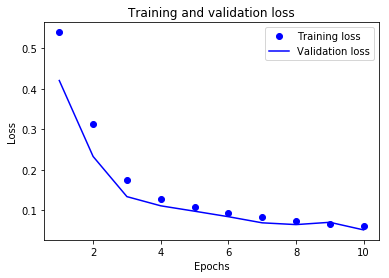

In [66]:
import matplotlib.pyplot as plt

history_dict = history.history 
loss_values = history_dict ['loss'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend()
plt.show()

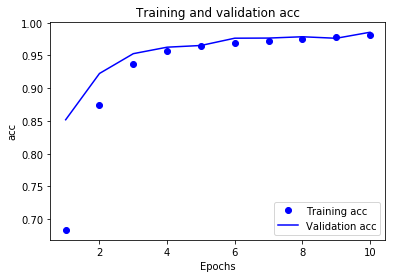

In [67]:
history_dict = history.history 
acc_values = history_dict ['acc'] 
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc') 
plt.plot(epochs, val_acc_values, 'b', label='Validation acc') 
plt.title('Training and validation acc') 
plt.xlabel('Epochs') 
plt.ylabel('acc') 
plt.legend()
plt.show()